<a href="https://colab.research.google.com/github/Harshavalmiki/CMPE-257--ML/blob/main/HW1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Goal Rewrite:**
The primary objective of this project is to gain valuable insights into the California housing market by categorizing neighborhoods based on various characteristics present in the dataset. Targeting real estate stakeholders, urban planners, and policymakers, the goal is to uncover patterns and similarities among neighborhoods. Through clustering, the project aims to identify distinct groups of neighborhoods sharing similar housing attributes. This information can empower decision-makers with crucial insights for optimizing resource allocation, formulating effective investment strategies, and implementing targeted interventions. The dataset encompasses key features, including longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity, with each row representing a specific neighborhood in California.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Dataset Link- https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [ ]:
file_path = "CA_housing.csv"
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.shape
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:

# Choosing relevant columns
data = data[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']]

# Drop nulls
df = data.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)



In [ ]:
# TensorFlow K-means implementation
def kmeans(X, num_clusters=4, max_iters=100):
    # Step 1: Initialization
    idxs = np.random.choice(len(X), size=num_clusters, replace=False)
    centroids = tf.Variable(X[idxs])

    for _ in range(max_iters):
        # Step 2: Assignment
        distances = tf.reduce_sum(tf.square(X[:, tf.newaxis] - centroids), axis=-1)
        assignments = tf.argmin(distances, axis=-1).numpy()

        # Step 3: Update centroids
        new_centroids = []
        for j in range(num_clusters):
            cluster_data = X[assignments == j]
            new_centroid = tf.reduce_mean(cluster_data, axis=0)
            new_centroids.append(new_centroid)

        centroids.assign(new_centroids)

    return assignments

# Perform K-means clustering using TensorFlow
assignments = kmeans(data_scaled, num_clusters=4)

# Create a DataFrame to plot the results
frame = pd.DataFrame(data_scaled)
frame['cluster'] = assignments



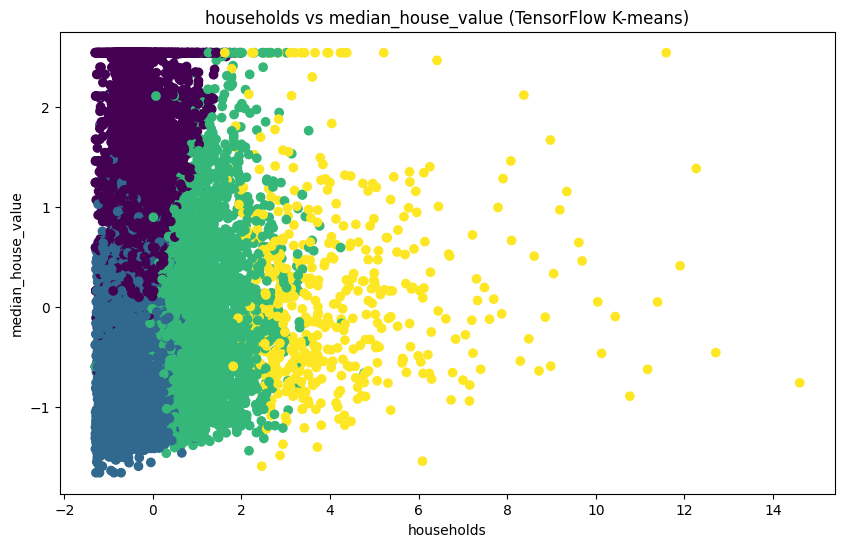

In [ ]:

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(frame[2], frame[4], c=frame['cluster'], cmap='viridis')
plt.xlabel('households')
plt.ylabel('median_house_value')
plt.title('households vs median_house_value (TensorFlow K-means)')
plt.show()
